# Installing Dependencies

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip uninstall tensorflow --y

In [ ]:
# !pip install tensorflow==2.7.0

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
#Saving the Data
def SaveToCSV(df,path):
  with open(path, 'w', encoding = 'utf-8-sig') as f:
    df.to_csv(f,index = False)

# Reading the Merged Data

In [ ]:
SLR_Data = pd.read_csv('/content/drive/Shareddrives/MSDA-SLR Project/SLR Project/Data/Combined_LiDAR_SST_TEMP_MEANSL_Allyears.csv')
                      #  usecols=['Latitude',	'Longitude',	'Elevation',	'County',	'Year',	'Date','avgtemp_C',	'prcp_mm','MeanSL']) 

print('shape: ',SLR_Data.shape)
SLR_Data.head()

shape:  (3891456, 22)


,Latitude,Longitude,Elevation,County,Year,Date,WDIR,WSPD,GST,WVHT,...,MWD,PRES,ATMP,WTMP,SURF_SALT_PSU,avgtemp_C,prcp_mm,avgTemp_F,prcp_inch,MeanSL
0,32.8306,-117.2834,-0.2,SanDiego,2009,2009-01-01,246.564865,4.645541,5.853514,3.000365,...,311.312162,1031.987027,15.065676,253.610174,33.419758,16.821993,24.207605,62.279588,0.953,7056.0
1,32.8306,-117.2834,-0.2,SanDiego,2009,2009-02-01,259.220566,5.455738,6.926528,3.223070,...,302.849478,1031.970045,14.670939,253.610174,33.383095,16.821993,24.207605,62.279588,0.953,7038.0
2,32.8306,-117.2834,-0.2,SanDiego,2009,2009-03-01,291.917790,6.563342,8.405526,4.900431,...,324.943396,1029.634097,13.086792,253.610174,33.448710,16.821993,6.100000,62.279588,0.240,7033.0
3,32.8306,-117.2834,-0.2,SanDiego,2009,2009-04-01,295.622036,7.509344,9.929149,10.195119,...,353.945607,1054.534449,12.410321,253.610174,33.601222,16.821993,2.300000,62.279588,0.091,7025.0
4,32.8306,-117.2834,-0.2,SanDiego,2009,2009-05-01,296.287149,7.307430,9.608434,11.571285,...,365.094378,1050.360040,16.946586,253.610174,33.682258,16.821993,5.400000,62.279588,0.213,7080.0


##Indexing timestamp

#### Indexing the Data

In [ ]:
SLR_Data.index = pd.to_datetime(SLR_Data['Date'], format='%Y-%m-%d')
print(SLR_Data.shape)

(3891456, 22)


#Data Preparation

In [ ]:
#one hot encoding
SLR_Data.drop(['Year','Date','avgtemp_C','prcp_inch'], axis=1,inplace=True)
# SLR_Data.drop(['Date'], axis=1,inplace=True)
SLR_Data["County"] = SLR_Data["County"].astype('category')
SLR_Data["County"] = SLR_Data["County"].cat.codes
SLR_Data.head()

,Latitude,Longitude,Elevation,County,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,SURF_SALT_PSU,prcp_mm,avgTemp_F,MeanSL
Date,,,,,,,,,,,,,,,,,,
2009-01-01,32.8306,-117.2834,-0.2,0,246.564865,4.645541,5.853514,3.000365,13.737068,9.196392,311.312162,1031.987027,15.065676,253.610174,33.419758,24.207605,62.279588,7056.0
2009-02-01,32.8306,-117.2834,-0.2,0,259.220566,5.455738,6.926528,3.223070,14.457124,8.885231,302.849478,1031.970045,14.670939,253.610174,33.383095,24.207605,62.279588,7038.0
2009-03-01,32.8306,-117.2834,-0.2,0,291.917790,6.563342,8.405526,4.900431,14.300512,9.782749,324.943396,1029.634097,13.086792,253.610174,33.448710,6.100000,62.279588,7033.0
2009-04-01,32.8306,-117.2834,-0.2,0,295.622036,7.509344,9.929149,10.195119,19.132901,14.613696,353.945607,1054.534449,12.410321,253.610174,33.601222,2.300000,62.279588,7025.0
2009-05-01,32.8306,-117.2834,-0.2,0,296.287149,7.307430,9.608434,11.571285,18.731004,15.285020,365.094378,1050.360040,16.946586,253.610174,33.682258,5.400000,62.279588,7080.0


####Standardization

In [ ]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
  
sc = StandardScaler()
Scaled_df = sc.fit_transform(SLR_Data)

####Transform the data into a time series problem

In [ ]:
TargetLoc = SLR_Data.columns.get_loc("Elevation")
#multivariate
def df_to_X_y(df, window_size=6):
  X = []
  y = []
  for i in range(len(df)-window_size):
    row = [r for r in df[i:i+window_size]]
    X.append(row)
    label = df[i+window_size][TargetLoc]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X, y = df_to_X_y(Scaled_df)
X.shape, y.shape

((3891450, 6, 18), (3891450,))

In [ ]:
X_train, y_train = X[:int(X.shape[0]*0.5)], y[:int(X.shape[0]*0.5)]
X_val, y_val = X[int(X.shape[0]*0.5):int(X.shape[0]*0.75)], y[int(X.shape[0]*0.5):int(X.shape[0]*0.75)]
X_test, y_test = X[int(X.shape[0]*0.75):], y[int(X.shape[0]*0.75):]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

#80:10:10
# X_train, y_train = X[:3113160], y[:3113160]
# X_val, y_val = X[3113160:3502305], y[3113160:3502305]
# X_test, y_test = X[3502305:], y[3502305:]
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1945725, 6, 18),
 (1945725,),
 (972862, 6, 18),
 (972862,),
 (972863, 6, 18),
 (972863,))

####Plot Predictions

In [ ]:
def plot_predictions(model, X, y, start, end):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end],label='Predictions')
  plt.plot(df['Actuals'][start:end],label='Actuals')
  plt.legend(loc="upper right")
  mse_val=mse(y, predictions,squared=True)
  rmse_val=mse(y, predictions,squared=False)
  mae_val=mae(y, predictions)
  print('MSE : ',mse_val)
  print('RMSE : ',rmse_val)
  print("MAE:", mae_val)
  print("R2: ",r2(y, predictions))
  print("mape: ",mape(y, predictions))
  print(df)
  return df, rmse_val, mse_val, mae_val

In [ ]:
def plot_history(history):
  # summarize history for accuracy
  plt.plot(history.history['root_mean_squared_error'])
  plt.plot(history.history['val_root_mean_squared_error'])
  plt.title('model rmse')
  plt.ylabel('rmse')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


#Model

In [ ]:
CNN_LSTM = Sequential()
CNN_LSTM.add(InputLayer((6, 18)))
CNN_LSTM.add(Conv1D(8, kernel_size=2))
CNN_LSTM.add(Conv1D(32, kernel_size=2))
CNN_LSTM.add(MaxPooling1D(pool_size=2))
CNN_LSTM.add(Dropout(0.2))
#CNN_LSTM.add(Flatten())

CNN_LSTM.add(LSTM(8))
CNN_LSTM.add(Dense(8, 'relu'))
CNN_LSTM.add(Dense(1, 'linear'))
print(CNN_LSTM.summary())
cp = ModelCheckpoint('CNN_LSTM/', save_best_only=True)
CNN_LSTM.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 8)              296       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 32)             544       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 32)             0         
                                                                 
 lstm (LSTM)                 (None, 8)                 1312      
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                        

Epoch 1/30
2689/2693 [============================>.] - ETA: 0s - loss: 0.0521 - root_mean_squared_error: 0.2284

2693/2693 [==============================] - 38s 13ms/step - loss: 0.0522 - root_mean_squared_error: 0.2286 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1519
Epoch 2/30
2692/2693 [============================>.] - ETA: 0s - loss: 0.0235 - root_mean_squared_error: 0.1533

2693/2693 [==============================] - 20s 7ms/step - loss: 0.0235 - root_mean_squared_error: 0.1533 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1431
Epoch 3/30
2685/2693 [============================>.] - ETA: 0s - loss: 0.0210 - root_mean_squared_error: 0.1448

2693/2693 [==============================] - 19s 7ms/step - loss: 0.0210 - root_mean_squared_error: 0.1447 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 4/30
2692/2693 [============================>.] - ETA: 0s - loss: 0.0196 - root_mean_squared_error: 0.1401

2693/2693 [==============================] - 19s 7ms/step - loss: 0.0196 - root_mean_squared_error: 0.1400 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 5/30
2686/2693 [============================>.] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.1379

2693/2693 [==============================] - 20s 7ms/step - loss: 0.0190 - root_mean_squared_error: 0.1378 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1350
Epoch 6/30
2688/2693 [============================>.] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1357

2693/2693 [==============================] - 20s 8ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1335
Epoch 7/30
2682/2693 [============================>.] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.1343

2693/2693 [==============================] - 19s 7ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1326
Epoch 8/30
2693/2693 [==============================] - 15s 5ms/step - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1401
Epoch 9/30
2693/2693 [==============================] - 13s 5ms/step - loss: 0.0174 - root_mean_squared_error: 0.1318 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1346
Epoch 10/30
2693/2693 [==============================] - 13s 5ms/step - loss: 0.0174 - root_mean_squared_error: 0.1317 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1334
Epoch 11/30
2693/2693 [==============================] - 16s 6ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 12/30
2693/2693 [==============================] - 14s 5ms/step - loss: 0.0169 - root_mean_squared_error: 0.1300 - val_loss: 0.0

2693/2693 [==============================] - 19s 7ms/step - loss: 0.0168 - root_mean_squared_error: 0.1297 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1318
Epoch 14/30
2690/2693 [============================>.] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1288

2693/2693 [==============================] - 21s 8ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1308
Epoch 15/30
2693/2693 [==============================] - 14s 5ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1363
Epoch 16/30
2693/2693 [==============================] - 19s 7ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 17/30
2693/2693 [==============================] - 14s 5ms/step - loss: 0.0162 - root_mean_squared_error: 0.1271 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1345
Epoch 18/30
2693/2693 [==============================] - 14s 5ms/step - loss: 0.0162 - root_mean_squared_error: 0.1271 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1333
Epoch 19/30
2693/2693 [==============================] - 15s 5ms/step - loss: 0.0162 - root_mean_squared_error: 0.1272 - val_loss: 0

2693/2693 [==============================] - 21s 8ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1306
Epoch 28/30
2693/2693 [==============================] - 32s 12ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1391
Epoch 29/30
2693/2693 [==============================] - 22s 8ms/step - loss: 0.0154 - root_mean_squared_error: 0.1241 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1395
Epoch 30/30
1347/1347 [==============================] - 3s 2ms/step
MSE :  0.018371720578361228
RMSE :  0.13554232024855273
MAE: 0.048404303970640904
R2:  0.9816287892700075
mape:  1.1739601518213805
       Predictions   Actuals
0         0.388157  0.634207
1         0.744703  0.634207
2         0.633578  0.634207
3         0.607312  0.634207
4         0.605752  0.634207
...            ...       ...
43073    -1.790064 -1.822951
43074    -1.785205 -1.822951
43075    -1.772143 -1

(       Predictions   Actuals
 0         0.388157  0.634207
 1         0.744703  0.634207
 2         0.633578  0.634207
 3         0.607312  0.634207
 4         0.605752  0.634207
 ...            ...       ...
 43073    -1.790064 -1.822951
 43074    -1.785205 -1.822951
 43075    -1.772143 -1.822951
 43076    -1.783233 -1.822951
 43077    -1.773927  0.634207
 
 [43078 rows x 2 columns],
 0.13554232024855273,
 0.018371720578361228,
 0.048404303970640904)

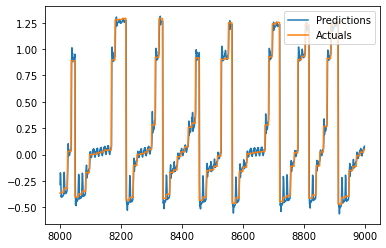

In [ ]:
history = CNN_LSTM.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=30, callbacks=[cp])
plot_predictions(CNN_LSTM, X_val, y_val,8000,9000)

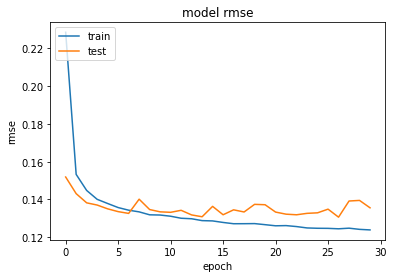

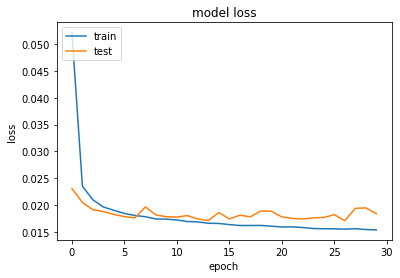

In [ ]:
plot_history(history)

1347/1347 [==============================] - 3s 2ms/step
MSE :  0.019998228891928975
RMSE :  0.14141509428603785
MAE: 0.06231254948923439
R2:  0.9800020486032679
mape:  1.5092845605776286
       Predictions   Actuals
0         0.741194  0.634207
1         0.828438  0.634207
2         0.681294  0.634207
3         0.636276  0.634207
4         0.612060  0.634207
...            ...       ...
43074    -1.845887 -1.820431
43075    -1.835056 -1.820431
43076    -1.857488 -1.820431
43077    -1.860644 -1.820431
43078    -1.814600 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0         0.741194  0.634207
 1         0.828438  0.634207
 2         0.681294  0.634207
 3         0.636276  0.634207
 4         0.612060  0.634207
 ...            ...       ...
 43074    -1.845887 -1.820431
 43075    -1.835056 -1.820431
 43076    -1.857488 -1.820431
 43077    -1.860644 -1.820431
 43078    -1.814600 -1.820431
 
 [43079 rows x 2 columns],
 0.14141509428603785,
 0.019998228891928975,
 0.06231254948923439)

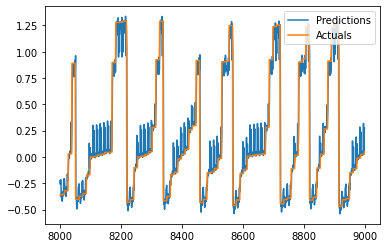

In [ ]:
plot_predictions(CNN_LSTM, X_test, y_test,8000,9000)

In [ ]:
import pickle
pickle.dump(CNN_LSTM, open('/content/drive/Shareddrives/MSDA-SLR Project/SLR Project/Data/CNN_LSTM.pkl', 'wb'))

## Testing the Model

In [ ]:
# Load model
saved_model = pickle.load(open('/content/drive/Shareddrives/MSDA-SLR Project/SLR Project/Data/CNN_LSTM.pkl', 'rb'))

In [ ]:
#using 2016 data to predict 2017
predictions = CNN_LSTM.predict(X_test)

1347/1347 [==============================] - 5s 4ms/step


In [ ]:
pred_invscale = sc_y.inverse_transform(predictions).flatten()
pred_invscale

array([ 0.75652707, -0.03767141,  0.19068097, ...,  0.14020501,
        0.13865729,  0.10773633], dtype=float32)

In [ ]:
y_val_inv = sc_y.inverse_transform(y_val.reshape((-1, 1))).flatten()
y_val_inv

array([0.5       , 0.5       , 0.5       , ..., 0.26      , 0.26      ,
       0.60041832])

In [ ]:
df = pd.DataFrame(data={'Predictions':pred_invscale, 'Actuals':y_val_inv})
df

,Predictions,Actuals
0,0.756527,0.500000
1,-0.037671,0.500000
2,0.190681,0.500000
3,-0.062225,0.500000
4,-0.066004,0.500000
...,...,...
43073,0.123399,0.260000
43074,0.131584,0.260000
43075,0.140205,0.260000
43076,0.138657,0.260000


In [ ]:
df = df[df.index.get_level_values(1) == 5]

In [ ]:
x_val_inversescale = sc_X.inverse_transform(df)
x_val_inversescale_df = pd.DataFrame(x_val_inversescale)
x_val_inversescale_df

,0,1,2,3,4
0,32.8306,-117.2834,16.821993,30.000000,7050.0
1,32.8306,-117.2834,16.821993,4.700000,7080.0
2,32.8306,-117.2834,16.821993,13.000000,7098.0
3,32.8306,-117.2834,16.821993,0.300000,7133.0
4,32.8306,-117.2834,16.821993,1.000000,7176.0
...,...,...,...,...,...
43073,32.5381,-117.1247,21.430000,0.000000,7236.0
43074,32.5381,-117.1247,22.080000,0.000000,7329.0
43075,32.5381,-117.1247,19.550000,0.000000,7318.0
43076,32.5381,-117.1247,17.370000,0.000000,7214.0


In [ ]:
x_val_inversescale_df.rename(columns={0:'Latitude',1:'Longitude',2:'AvgTemp',3:'Precp',4:'MeanSeaLevel'},inplace=True)

In [ ]:
x_val_inversescale_df['ActualElevation'] = y_val_inv
x_val_inversescale_df['PredictedElevation'] = pred_invscale

In [ ]:
x_val_inversescale_df['difference'] = x_val_inversescale_df['ActualElevation']-x_val_inversescale_df['PredictedElevation']
x_val_inversescale_df[x_val_inversescale_df['difference']>0].sort_values('difference')

,Latitude,Longitude,AvgTemp,Precp,MeanSeaLevel,ActualElevation,PredictedElevation,difference
8420,32.7638,-117.2564,16.821993,8.800000,7176.0,0.1350,0.134960,0.000040
37161,32.6831,-117.1884,15.070000,79.500000,7257.0,0.0200,0.019904,0.000096
16967,32.6445,-117.1493,12.760000,15.200000,7049.0,0.2875,0.287399,0.000101
5216,32.8544,-117.2604,16.821993,13.900000,7176.0,0.2000,0.199802,0.000198
23452,32.9688,-117.2713,16.821993,8.900000,7238.0,0.2800,0.279739,0.000261
...,...,...,...,...,...,...,...,...
19587,32.5796,-117.1338,18.480000,0.000000,7133.0,5.1900,0.167741,5.022259
19591,32.5796,-117.1338,17.000000,0.000000,7213.0,5.1900,0.163117,5.026883
19581,32.5764,-117.1338,13.200000,24.207605,7158.0,5.1900,0.155628,5.034372
19590,32.5796,-117.1338,19.800000,1.800000,7232.0,5.1900,0.146157,5.043843


In [ ]:
SaveToCSV(x_val_inversescale_df,path = '/content/drive/Shareddrives/MSDA-SLR Project/SLR Project/Data/CNN_LSTM_ActualVsPred.csv')

##With Callback

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = CNN_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs = 50, 
                    callbacks =[earlystopping])

plot_history(history)
plot_predictions(CNN_LSTM, X_val, y_val, 8000,9000)

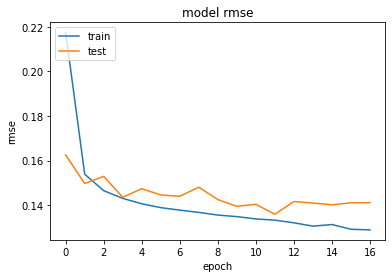

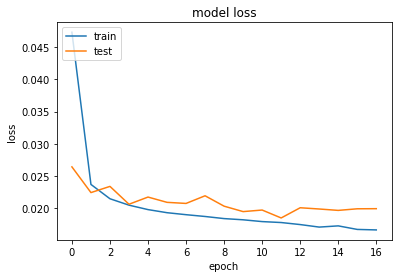

1347/1347 [==============================] - 3s 2ms/step
MSE :  0.018461641139996973
RMSE :  0.13587362194332267
MAE: 0.05743744996970059
R2:  0.9815386150335257
mape:  1.4313869159960586
       Predictions   Actuals
0         1.084121  0.634207
1         0.867527  0.634207
2         0.606500  0.634207
3         0.784334  0.634207
4         0.556850  0.634207
...            ...       ...
43074    -1.782508 -1.820431
43075    -1.800850 -1.820431
43076    -1.804265 -1.820431
43077    -1.777488 -1.820431
43078    -1.807391 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0         1.084121  0.634207
 1         0.867527  0.634207
 2         0.606500  0.634207
 3         0.784334  0.634207
 4         0.556850  0.634207
 ...            ...       ...
 43074    -1.782508 -1.820431
 43075    -1.800850 -1.820431
 43076    -1.804265 -1.820431
 43077    -1.777488 -1.820431
 43078    -1.807391 -1.820431
 
 [43079 rows x 2 columns],
 0.13587362194332267,
 0.018461641139996973,
 0.05743744996970059)

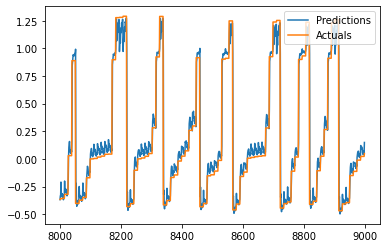

In [ ]:
plot_history(history)
plot_predictions(CNN_LSTM, X_test, y_test, 8000,9000)

#Timeseries Split (k fold validation) and Fitting the Model

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
rmse_values = []
mse_values=[]
mae_values=[]

tscv = TimeSeriesSplit(n_splits = 4)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    history = CNN_LSTM.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10, callbacks=[cp])
    predictions = CNN_LSTM.predict(X_test)
    mse_temp=mse(y_test, predictions,squared=True)
    rmse_temp=mse(y_test, predictions,squared=False)
    mae_temp=mae(y_test, predictions)
    # _,rmse_temp, mse_temp, mae_temp = plot_predictions(CNN_LSTM, X_test, y_test)
    rmse_values.append(rmse_temp)
    mse_values.append(mse_temp)
    mae_values.append(mae_temp)

print()
print('********Result*******')
print("RMSE: {}".format(np.mean(rmse_values)))    
print("MSE: {}".format(np.mean(mse_values)))
print("MAE: {}".format(np.mean(mae_values)))

Epoch 1/10
24322/24322 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0648

24322/24322 [==============================] - 169s 6ms/step - loss: 0.0042 - root_mean_squared_error: 0.0648 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 2/10
24313/24322 [============================>.] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0347

24322/24322 [==============================] - 157s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - val_loss: 6.3368e-04 - val_root_mean_squared_error: 0.0252
Epoch 3/10
24317/24322 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0320

24322/24322 [==============================] - 157s 6ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 5.1408e-04 - val_root_mean_squared_error: 0.0227
Epoch 4/10
24319/24322 [============================>.] - ETA: 0s - loss: 8.9914e-04 - root_mean_squared_error: 0.0300

24322/24322 [==============================] - 157s 6ms/step - loss: 8.9905e-04 - root_mean_squared_error: 0.0300 - val_loss: 4.0846e-04 - val_root_mean_squared_error: 0.0202
Epoch 5/10
24322/24322 [==============================] - 152s 6ms/step - loss: 8.2446e-04 - root_mean_squared_error: 0.0287 - val_loss: 5.4876e-04 - val_root_mean_squared_error: 0.0234
Epoch 6/10
24322/24322 [==============================] - 152s 6ms/step - loss: 7.7061e-04 - root_mean_squared_error: 0.0278 - val_loss: 4.2051e-04 - val_root_mean_squared_error: 0.0205
Epoch 7/10
24317/24322 [============================>.] - ETA: 0s - loss: 7.4427e-04 - root_mean_squared_error: 0.0273

24322/24322 [==============================] - 156s 6ms/step - loss: 7.4415e-04 - root_mean_squared_error: 0.0273 - val_loss: 3.8748e-04 - val_root_mean_squared_error: 0.0197
Epoch 8/10
24313/24322 [============================>.] - ETA: 0s - loss: 7.2914e-04 - root_mean_squared_error: 0.0270

24322/24322 [==============================] - 156s 6ms/step - loss: 7.2905e-04 - root_mean_squared_error: 0.0270 - val_loss: 2.4776e-04 - val_root_mean_squared_error: 0.0157
Epoch 9/10
24318/24322 [============================>.] - ETA: 0s - loss: 7.1200e-04 - root_mean_squared_error: 0.0267

24322/24322 [==============================] - 157s 6ms/step - loss: 7.1200e-04 - root_mean_squared_error: 0.0267 - val_loss: 1.7912e-04 - val_root_mean_squared_error: 0.0134
Epoch 10/10
24322/24322 [==============================] - 45s 2ms/step
Epoch 1/10
48644/48644 [==============================] - 258s 5ms/step - loss: 3.8175e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.1292 - val_root_mean_squared_error: 0.3594
Epoch 2/10
48644/48644 [==============================] - 258s 5ms/step - loss: 3.7191e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.1243 - val_root_mean_squared_error: 0.3526
Epoch 3/10
48644/48644 [==============================] - 260s 5ms/step - loss: 3.7319e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.2949 - val_root_mean_squared_error: 0.5431
Epoch 4/10
48644/48644 [==============================] - 261s 5ms/step - loss: 3.6900e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.4073 - val_root_mean_squared_error: 0.6382
Epoch 5/10
48644/48644 [=

72965/72965 [==============================] - 370s 5ms/step - loss: 2.4853e-04 - root_mean_squared_error: 0.0158 - val_loss: 1.5369e-04 - val_root_mean_squared_error: 0.0124
Epoch 2/10
72960/72965 [============================>.] - ETA: 0s - loss: 2.6159e-04 - root_mean_squared_error: 0.0162

72965/72965 [==============================] - 370s 5ms/step - loss: 2.6157e-04 - root_mean_squared_error: 0.0162 - val_loss: 8.7283e-05 - val_root_mean_squared_error: 0.0093
Epoch 3/10
72965/72965 [==============================] - 362s 5ms/step - loss: 2.6268e-04 - root_mean_squared_error: 0.0162 - val_loss: 1.0800e-04 - val_root_mean_squared_error: 0.0104
Epoch 4/10
72965/72965 [==============================] - 363s 5ms/step - loss: 2.5799e-04 - root_mean_squared_error: 0.0161 - val_loss: 4.7416e-04 - val_root_mean_squared_error: 0.0218
Epoch 5/10
72965/72965 [==============================] - 362s 5ms/step - loss: 2.4730e-04 - root_mean_squared_error: 0.0157 - val_loss: 6.7604e-04 - val_root_mean_squared_error: 0.0260
Epoch 6/10
72965/72965 [==============================] - 363s 5ms/step - loss: 2.4281e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 7/10
72965/72965 [==============================] - 363s 5ms/step - loss: 2.359

97287/97287 [==============================] - 493s 5ms/step - loss: 1.8568e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.6669e-05 - val_root_mean_squared_error: 0.0041
Epoch 2/10
97287/97287 [==============================] - 475s 5ms/step - loss: 1.7837e-04 - root_mean_squared_error: 0.0134 - val_loss: 5.1636e-05 - val_root_mean_squared_error: 0.0072
Epoch 3/10
97287/97287 [==============================] - 466s 5ms/step - loss: 1.7280e-04 - root_mean_squared_error: 0.0131 - val_loss: 3.2980e-05 - val_root_mean_squared_error: 0.0057
Epoch 4/10
97287/97287 [==============================] - 467s 5ms/step - loss: 1.7269e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.7574e-05 - val_root_mean_squared_error: 0.0042
Epoch 5/10
97287/97287 [==============================] - 465s 5ms/step - loss: 1.7167e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.8173e-05 - val_root_mean_squared_error: 0.0053
Epoch 6/10
97277/97287 [============================>.] - ETA: 0s - loss: 1.7146e

97287/97287 [==============================] - 468s 5ms/step - loss: 1.7145e-04 - root_mean_squared_error: 0.0131 - val_loss: 5.4753e-06 - val_root_mean_squared_error: 0.0023
Epoch 7/10
97287/97287 [==============================] - 464s 5ms/step - loss: 1.7299e-04 - root_mean_squared_error: 0.0132 - val_loss: 6.5204e-06 - val_root_mean_squared_error: 0.0026
Epoch 8/10
97287/97287 [==============================] - 465s 5ms/step - loss: 1.7690e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.0867e-05 - val_root_mean_squared_error: 0.0033
Epoch 9/10
97283/97287 [============================>.] - ETA: 0s - loss: 1.7341e-04 - root_mean_squared_error: 0.0132

97287/97287 [==============================] - 472s 5ms/step - loss: 1.7341e-04 - root_mean_squared_error: 0.0132 - val_loss: 4.8118e-06 - val_root_mean_squared_error: 0.0022
Epoch 10/10
24322/24322 [==============================] - 45s 2ms/step

********Result*******
RMSE: 0.14621691532573375
MSE: 0.07224984118029683
MAE: 0.09317336156836056


#Model development

# CNN Multivariate

#### CNN without Maxpool

In [ ]:
model1_CNN1D = Sequential()
model1_CNN1D.add(InputLayer((6, 6)))
model1_CNN1D.add(Conv1D(32, kernel_size=2))
model1_CNN1D.add(Flatten())
model1_CNN1D.add(Dense(8, 'relu'))
model1_CNN1D.add(Dense(1, 'linear'))

model1_CNN1D.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 32)             416       
                                                                 
 flatten_2 (Flatten)         (None, 160)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 1288      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,713
Trainable params: 1,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1_CNN1D/', save_best_only=True)
model1_CNN1D.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1_history = model1_CNN1D.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp1])

Epoch 1/30
2693/2693 [==============================] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1143

2693/2693 [==============================] - 14s 5ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1651
Epoch 2/30
2693/2693 [==============================] - 11s 4ms/step - loss: 0.0130 - root_mean_squared_error: 0.1138 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1682
Epoch 3/30
2693/2693 [==============================] - 10s 4ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1711
Epoch 4/30
2693/2693 [==============================] - 10s 4ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1735
Epoch 5/30
2693/2693 [==============================] - 10s 4ms/step - loss: 0.0128 - root_mean_squared_error: 0.1132 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1721
Epoch 6/30
2693/2693 [==============================] - 11s 4ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0310

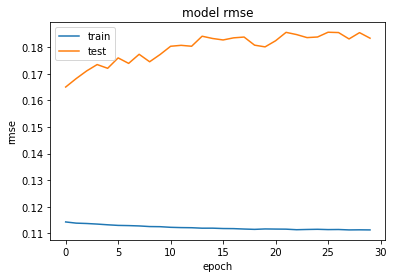

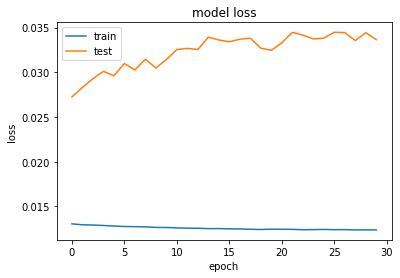

In [ ]:
plot_history(model1_history)

1347/1347 [==============================] - 2s 1ms/step
MSE :  0.05871481309019864
RMSE :  0.2423113969465709
MAE: 0.13118372125032496
R2:  0.9412860016358806
mape:  3.0682298691213217
       Predictions   Actuals
0         0.474692  0.634207
1         0.815228  0.634207
2         0.902978  0.634207
3         0.752943  0.634207
4         0.718045  0.634207
...            ...       ...
43074    -1.823582 -1.820431
43075    -1.832381 -1.820431
43076    -1.851003 -1.820431
43077    -1.844583 -1.820431
43078    -1.848379 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0         0.474692  0.634207
 1         0.815228  0.634207
 2         0.902978  0.634207
 3         0.752943  0.634207
 4         0.718045  0.634207
 ...            ...       ...
 43074    -1.823582 -1.820431
 43075    -1.832381 -1.820431
 43076    -1.851003 -1.820431
 43077    -1.844583 -1.820431
 43078    -1.848379 -1.820431
 
 [43079 rows x 2 columns],
 0.2423113969465709,
 0.05871481309019864,
 0.13118372125032496)

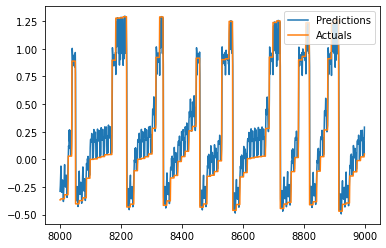

In [ ]:
plot_predictions(model1_CNN1D, X_test, y_test,8000,9000)

1347/1347 [==============================] - 2s 1ms/step
MSE :  0.035833702061226956
RMSE :  0.18929791879792804
MAE: 0.07525918949075007
R2:  0.9641672923886103
mape:  2.0722121686216717
       Predictions   Actuals
0         0.621647  0.634207
1         0.630799  0.634207
2         0.609910  0.634207
3         0.636910  0.634207
4         0.636154  0.634207
...            ...       ...
43073    -1.863663 -1.822951
43074    -2.338653 -1.822951
43075    -1.899723 -1.822951
43076    -1.837607 -1.822951
43077    -2.473159  0.634207

[43078 rows x 2 columns]


(       Predictions   Actuals
 0         0.621647  0.634207
 1         0.630799  0.634207
 2         0.609910  0.634207
 3         0.636910  0.634207
 4         0.636154  0.634207
 ...            ...       ...
 43073    -1.863663 -1.822951
 43074    -2.338653 -1.822951
 43075    -1.899723 -1.822951
 43076    -1.837607 -1.822951
 43077    -2.473159  0.634207
 
 [43078 rows x 2 columns],
 0.18929791879792804,
 0.035833702061226956,
 0.07525918949075007)

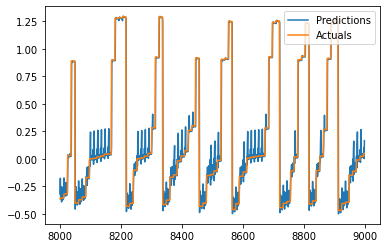

In [ ]:
plot_predictions(model1_CNN1D, X_val, y_val,8000,9000)

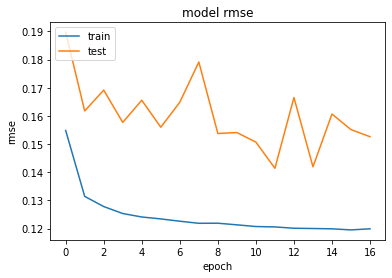

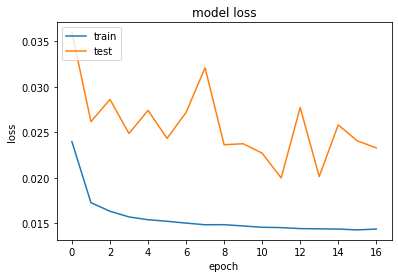

In [ ]:
plot_history(history)

#### CNN with Maxpool

In [ ]:
model2_CNN1D = Sequential()
model2_CNN1D.add(InputLayer((6, 7)))
model2_CNN1D.add(Conv1D(8, kernel_size=2))
model2_CNN1D.add(MaxPooling1D(pool_size=2))
model2_CNN1D.add(Flatten())
model2_CNN1D.add(Dense(8, 'relu'))
model2_CNN1D.add(Dense(1, 'linear'))

model2_CNN1D.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 5, 8)              104       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 8)             0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
________________________________________________________

In [ ]:
cp2 = ModelCheckpoint('model2_CNN1D/', save_best_only=True)
model2_CNN1D.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
history = model2_CNN1D.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp2])

Epoch 1/30
2681/2693 [============================>.] - ETA: 0s - loss: 0.0822 - root_mean_squared_error: 0.2867

2693/2693 [==============================] - 10s 3ms/step - loss: 0.0821 - root_mean_squared_error: 0.2865 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2150
Epoch 2/30
2674/2693 [============================>.] - ETA: 0s - loss: 0.0367 - root_mean_squared_error: 0.1915

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0367 - root_mean_squared_error: 0.1915 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2002
Epoch 3/30
2673/2693 [============================>.] - ETA: 0s - loss: 0.0342 - root_mean_squared_error: 0.1848

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0343 - root_mean_squared_error: 0.1851 - val_loss: 0.0400 - val_root_mean_squared_error: 0.2000
Epoch 4/30
2687/2693 [============================>.] - ETA: 0s - loss: 0.0333 - root_mean_squared_error: 0.1826

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0333 - root_mean_squared_error: 0.1825 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1963
Epoch 5/30
2686/2693 [============================>.] - ETA: 0s - loss: 0.0326 - root_mean_squared_error: 0.1807

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0326 - root_mean_squared_error: 0.1807 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1950
Epoch 6/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0318 - root_mean_squared_error: 0.1783 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1954
Epoch 7/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0309 - root_mean_squared_error: 0.1759 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1953
Epoch 8/30
2677/2693 [============================>.] - ETA: 0s - loss: 0.0302 - root_mean_squared_error: 0.1737

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0302 - root_mean_squared_error: 0.1739 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1922
Epoch 9/30
2689/2693 [============================>.] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1724

2693/2693 [==============================] - 13s 5ms/step - loss: 0.0298 - root_mean_squared_error: 0.1726 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 10/30
2690/2693 [============================>.] - ETA: 0s - loss: 0.0295 - root_mean_squared_error: 0.1717

2693/2693 [==============================] - 8s 3ms/step - loss: 0.0295 - root_mean_squared_error: 0.1717 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1901
Epoch 11/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0291 - root_mean_squared_error: 0.1707 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1906
Epoch 12/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0291 - root_mean_squared_error: 0.1705 - val_loss: 0.0368 - val_root_mean_squared_error: 0.1918
Epoch 13/30
2681/2693 [============================>.] - ETA: 0s - loss: 0.0288 - root_mean_squared_error: 0.1697

2693/2693 [==============================] - 11s 4ms/step - loss: 0.0288 - root_mean_squared_error: 0.1696 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1898
Epoch 14/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0286 - root_mean_squared_error: 0.1692 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1904
Epoch 15/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0285 - root_mean_squared_error: 0.1687 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1905
Epoch 16/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0283 - root_mean_squared_error: 0.1683 - val_loss: 0.0368 - val_root_mean_squared_error: 0.1919
Epoch 17/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0282 - root_mean_squared_error: 0.1680 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2017
Epoch 18/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0281 - root_mean_squared_error: 0.1676 - val_loss: 0.0370

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0278 - root_mean_squared_error: 0.1669 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1886
Epoch 23/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0278 - root_mean_squared_error: 0.1667 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1929
Epoch 24/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0277 - root_mean_squared_error: 0.1665 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1898
Epoch 25/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0277 - root_mean_squared_error: 0.1664 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1937
Epoch 26/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0277 - root_mean_squared_error: 0.1663 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1924
Epoch 27/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0276 - root_mean_squared_error: 0.1663 - val_loss: 0.0369 

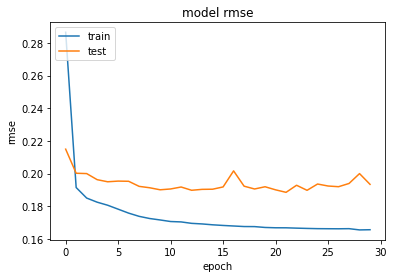

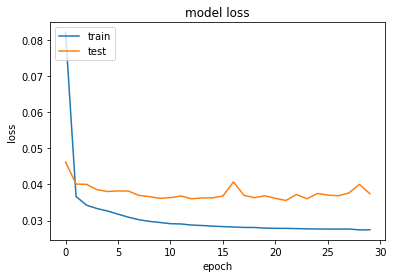

In [ ]:
plot_history(history)

1347/1347 [==============================] - 2s 1ms/step
MSE :  0.04150021076668187
RMSE :  0.20371600518045183
MAE: 0.10827324209388105
R2:  0.9585003650897712
mape:  3.304249930918714
       Predictions   Actuals
0        -1.756691  0.634207
1         0.524273  0.634207
2         1.107083  0.634207
3         1.298703  0.634207
4         0.792668  0.634207
...            ...       ...
43074    -1.769583 -1.820431
43075    -1.739466 -1.820431
43076    -1.760746 -1.820431
43077    -1.723667 -1.820431
43078    -1.767502 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0        -1.756691  0.634207
 1         0.524273  0.634207
 2         1.107083  0.634207
 3         1.298703  0.634207
 4         0.792668  0.634207
 ...            ...       ...
 43074    -1.769583 -1.820431
 43075    -1.739466 -1.820431
 43076    -1.760746 -1.820431
 43077    -1.723667 -1.820431
 43078    -1.767502 -1.820431
 
 [43079 rows x 2 columns],
 0.20371600518045183,
 0.04150021076668187,
 0.10827324209388105)

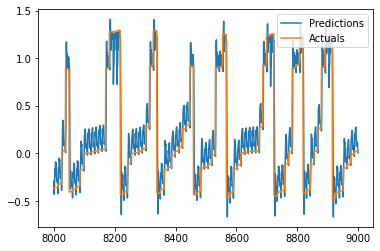

In [ ]:
plot_predictions(model2_CNN1D, X_test, y_test,8000,9000)

1347/1347 [==============================] - 4s 3ms/step
MSE :  0.03742184939811062
RMSE :  0.19344727808400566
MAE: 0.08872668344382943
R2:  0.9625791891256786
mape:  2.428543462472542
       Predictions   Actuals
0         1.125660  0.634207
1         1.007763  0.634207
2         0.726660  0.634207
3         0.630927  0.634207
4         0.602391  0.634207
...            ...       ...
43073    -1.764690 -1.822951
43074    -1.771222 -1.822951
43075    -1.787820 -1.822951
43076    -1.782866 -1.822951
43077    -1.747447  0.634207

[43078 rows x 2 columns]


(       Predictions   Actuals
 0         1.125660  0.634207
 1         1.007763  0.634207
 2         0.726660  0.634207
 3         0.630927  0.634207
 4         0.602391  0.634207
 ...            ...       ...
 43073    -1.764690 -1.822951
 43074    -1.771222 -1.822951
 43075    -1.787820 -1.822951
 43076    -1.782866 -1.822951
 43077    -1.747447  0.634207
 
 [43078 rows x 2 columns],
 0.19344727808400566,
 0.03742184939811062,
 0.08872668344382943)

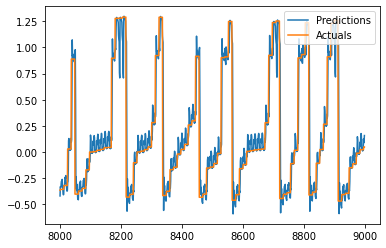

In [ ]:
plot_predictions(model2_CNN1D, X_val, y_val,8000,9000)

#### CNN with dropout

In [ ]:
model3_CNN1D = Sequential()
model3_CNN1D.add(InputLayer((6, 6)))
model3_CNN1D.add(Conv1D(8, kernel_size=2))
model3_CNN1D.add(Conv1D(32, kernel_size=2))
model3_CNN1D.add(MaxPooling1D(pool_size=2))
model3_CNN1D.add(Dropout(0.2))
model3_CNN1D.add(Flatten())
model3_CNN1D.add(Dense(8, 'relu'))
model3_CNN1D.add(Dense(1, 'linear'))

model3_CNN1D.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 5, 8)              104       
                                                                 
 conv1d_19 (Conv1D)          (None, 4, 32)             544       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 2, 32)             0         
                                                                 
 flatten_12 (Flatten)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                     

In [ ]:
cp3 = ModelCheckpoint('model3_CNN1D/', save_best_only=True)
model3_CNN1D.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
history3 = model3_CNN1D.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp3])

Epoch 1/30
2692/2693 [============================>.] - ETA: 0s - loss: 0.0691 - root_mean_squared_error: 0.2628

2693/2693 [==============================] - 16s 6ms/step - loss: 0.0690 - root_mean_squared_error: 0.2628 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1581
Epoch 2/30
2693/2693 [==============================] - ETA: 0s - loss: 0.0258 - root_mean_squared_error: 0.1607

2693/2693 [==============================] - 15s 6ms/step - loss: 0.0258 - root_mean_squared_error: 0.1607 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1483
Epoch 3/30
2685/2693 [============================>.] - ETA: 0s - loss: 0.0237 - root_mean_squared_error: 0.1538

2693/2693 [==============================] - 15s 6ms/step - loss: 0.0237 - root_mean_squared_error: 0.1539 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1475
Epoch 4/30
2688/2693 [============================>.] - ETA: 0s - loss: 0.0227 - root_mean_squared_error: 0.1506

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0227 - root_mean_squared_error: 0.1505 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 5/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0217 - root_mean_squared_error: 0.1473 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1406
Epoch 6/30
2674/2693 [============================>.] - ETA: 0s - loss: 0.0211 - root_mean_squared_error: 0.1452

2693/2693 [==============================] - 11s 4ms/step - loss: 0.0211 - root_mean_squared_error: 0.1454 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 7/30
2691/2693 [============================>.] - ETA: 0s - loss: 0.0208 - root_mean_squared_error: 0.1443

2693/2693 [==============================] - 9s 3ms/step - loss: 0.0208 - root_mean_squared_error: 0.1443 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 8/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0205 - root_mean_squared_error: 0.1433 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1391
Epoch 9/30
2691/2693 [============================>.] - ETA: 0s - loss: 0.0204 - root_mean_squared_error: 0.1427

2693/2693 [==============================] - 10s 4ms/step - loss: 0.0204 - root_mean_squared_error: 0.1427 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1380
Epoch 10/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0202 - root_mean_squared_error: 0.1420 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1384
Epoch 11/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0199 - root_mean_squared_error: 0.1411 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1385
Epoch 12/30
2686/2693 [============================>.] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1405

2693/2693 [==============================] - 11s 4ms/step - loss: 0.0198 - root_mean_squared_error: 0.1406 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 13/30
2675/2693 [============================>.] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1405

2693/2693 [==============================] - 10s 4ms/step - loss: 0.0197 - root_mean_squared_error: 0.1405 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1350
Epoch 14/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0195 - root_mean_squared_error: 0.1397 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1357
Epoch 15/30
2693/2693 [==============================] - 8s 3ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 16/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1385
Epoch 17/30
2693/2693 [==============================] - 11s 4ms/step - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1353
Epoch 18/30
2678/2693 [============================>.] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.1392

2693/2693 [==============================] - 13s 5ms/step - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1340
Epoch 19/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0193 - root_mean_squared_error: 0.1391 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1372
Epoch 20/30
2693/2693 [==============================] - 10s 4ms/step - loss: 0.0192 - root_mean_squared_error: 0.1384 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1387
Epoch 21/30
2678/2693 [============================>.] - ETA: 0s - loss: 0.0193 - root_mean_squared_error: 0.1388

2693/2693 [==============================] - 11s 4ms/step - loss: 0.0193 - root_mean_squared_error: 0.1388 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1335
Epoch 22/30
2693/2693 [==============================] - 11s 4ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1340
Epoch 23/30
2693/2693 [==============================] - 9s 4ms/step - loss: 0.0190 - root_mean_squared_error: 0.1378 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 24/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 25/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 26/30
2693/2693 [==============================] - 9s 3ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.018

2693/2693 [==============================] - 10s 4ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332


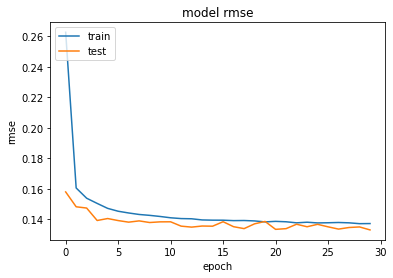

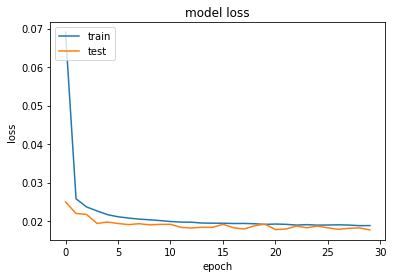

1347/1347 [==============================] - 2s 1ms/step
MSE :  0.019993519236970302
RMSE :  0.14139844142341282
MAE: 0.05422928445675671
R2:  0.9800067581928754
mape:  1.6397725407481107
       Predictions   Actuals
0         0.507733  0.634207
1         0.789637  0.634207
2         0.508778  0.634207
3         0.826478  0.634207
4         0.464484  0.634207
...            ...       ...
43074    -1.825392 -1.820431
43075    -1.817197 -1.820431
43076    -1.831155 -1.820431
43077    -1.830542 -1.820431
43078    -1.832403 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0         0.507733  0.634207
 1         0.789637  0.634207
 2         0.508778  0.634207
 3         0.826478  0.634207
 4         0.464484  0.634207
 ...            ...       ...
 43074    -1.825392 -1.820431
 43075    -1.817197 -1.820431
 43076    -1.831155 -1.820431
 43077    -1.830542 -1.820431
 43078    -1.832403 -1.820431
 
 [43079 rows x 2 columns],
 0.14139844142341282,
 0.019993519236970302,
 0.05422928445675671)

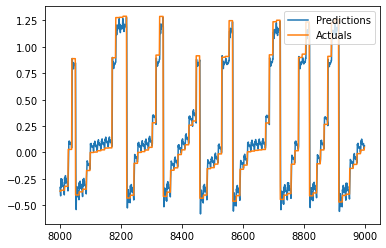

In [ ]:
plot_history(history3)
plot_predictions(model3_CNN1D, X_test, y_test,8000,9000)

1347/1347 [==============================] - 2s 1ms/step
MSE :  0.01773122326099564
RMSE :  0.13315863945308107
MAE: 0.04300166478081526
R2:  0.9822692688124177
mape:  1.3104771930186594
       Predictions   Actuals
0         0.513115  0.634207
1         0.776853  0.634207
2         0.499800  0.634207
3         0.622975  0.634207
4         0.623056  0.634207
...            ...       ...
43073    -1.826097 -1.822951
43074    -1.818834 -1.822951
43075    -1.828208 -1.822951
43076    -1.837000 -1.822951
43077    -1.826251  0.634207

[43078 rows x 2 columns]


(       Predictions   Actuals
 0         0.513115  0.634207
 1         0.776853  0.634207
 2         0.499800  0.634207
 3         0.622975  0.634207
 4         0.623056  0.634207
 ...            ...       ...
 43073    -1.826097 -1.822951
 43074    -1.818834 -1.822951
 43075    -1.828208 -1.822951
 43076    -1.837000 -1.822951
 43077    -1.826251  0.634207
 
 [43078 rows x 2 columns],
 0.13315863945308107,
 0.01773122326099564,
 0.04300166478081526)

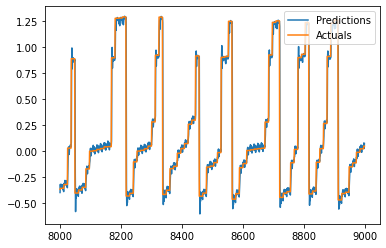

In [ ]:
plot_predictions(model3_CNN1D, X_val, y_val,8000,9000)

#### Early Stopping

In [ ]:
from keras import callbacks

model3_CNN1D.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history3 = model3_CNN1D.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs = 50, 
                    callbacks =[earlystopping])

Epoch 1/50
2693/2693 [==============================] - 15s 5ms/step - loss: 0.0565 - root_mean_squared_error: 0.2376 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1571
Epoch 2/50
2693/2693 [==============================] - 15s 6ms/step - loss: 0.0253 - root_mean_squared_error: 0.1589 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1475
Epoch 3/50
2693/2693 [==============================] - 15s 5ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1435
Epoch 4/50
2693/2693 [==============================] - 15s 5ms/step - loss: 0.0224 - root_mean_squared_error: 0.1498 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 5/50
2693/2693 [==============================] - 16s 6ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1394
Epoch 6/50
2693/2693 [==============================] - 15s 6ms/step - loss: 0.0213 - root_mean_squared_error: 0.1460 - val_l

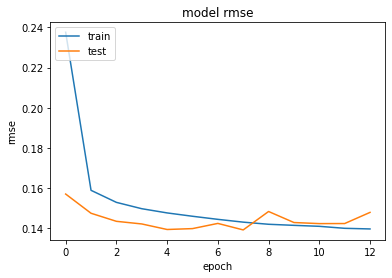

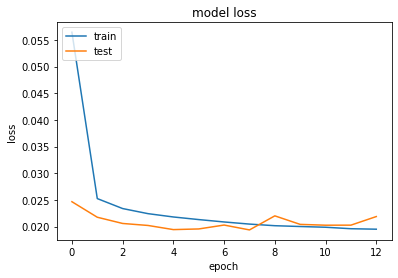

1347/1347 [==============================] - 2s 2ms/step
MSE :  0.01938263790624436
RMSE :  0.13922154253650676
MAE: 0.05615423972643527
R2:  0.9806176310470189
mape:  1.3505169470114586
       Predictions   Actuals
0         0.221625  0.634207
1         0.766978  0.634207
2         0.543863  0.634207
3         0.741137  0.634207
4         0.429555  0.634207
...            ...       ...
43074    -1.830614 -1.820431
43075    -1.825210 -1.820431
43076    -1.808934 -1.820431
43077    -1.792970 -1.820431
43078    -1.790105 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0         0.221625  0.634207
 1         0.766978  0.634207
 2         0.543863  0.634207
 3         0.741137  0.634207
 4         0.429555  0.634207
 ...            ...       ...
 43074    -1.830614 -1.820431
 43075    -1.825210 -1.820431
 43076    -1.808934 -1.820431
 43077    -1.792970 -1.820431
 43078    -1.790105 -1.820431
 
 [43079 rows x 2 columns],
 0.13922154253650676,
 0.01938263790624436,
 0.05615423972643527)

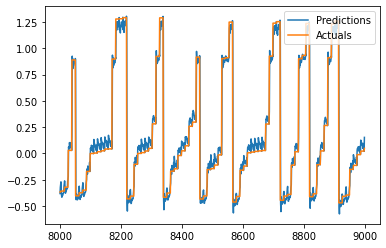

In [ ]:
plot_history(history3)
plot_predictions(model3_CNN1D, X_test, y_test,8000,9000)

1347/1347 [==============================] - 2s 2ms/step
MSE :  0.017982576206503734
RMSE :  0.13409912828390697
MAE: 0.047356658363148424
R2:  0.9820179228424071
mape:  1.5886980234904895
       Predictions   Actuals
0         0.598737  0.634207
1         0.706767  0.634207
2         0.448855  0.634207
3         0.620378  0.634207
4         0.621055  0.634207
...            ...       ...
43073    -1.809891 -1.822951
43074    -1.812417 -1.822951
43075    -1.822096 -1.822951
43076    -1.811969 -1.822951
43077    -1.822765  0.634207

[43078 rows x 2 columns]


(       Predictions   Actuals
 0         0.598737  0.634207
 1         0.706767  0.634207
 2         0.448855  0.634207
 3         0.620378  0.634207
 4         0.621055  0.634207
 ...            ...       ...
 43073    -1.809891 -1.822951
 43074    -1.812417 -1.822951
 43075    -1.822096 -1.822951
 43076    -1.811969 -1.822951
 43077    -1.822765  0.634207
 
 [43078 rows x 2 columns],
 0.13409912828390697,
 0.017982576206503734,
 0.047356658363148424)

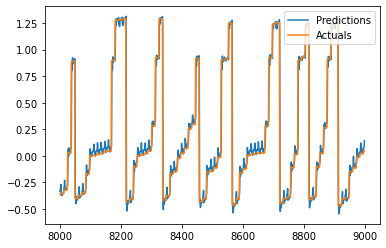

In [ ]:
plot_predictions(model3_CNN1D, X_val, y_val,8000,9000)

1347/1347 [==============================] - 4s 3ms/step
MSE :  0.04150021076668187
RMSE :  0.20371600518045183
MAE: 0.10827324209388105
R2:  0.9585003650897712
mape:  3.304249930918714
       Predictions   Actuals
0        -1.756691  0.634207
1         0.524273  0.634207
2         1.107083  0.634207
3         1.298703  0.634207
4         0.792668  0.634207
...            ...       ...
43074    -1.769583 -1.820431
43075    -1.739466 -1.820431
43076    -1.760746 -1.820431
43077    -1.723667 -1.820431
43078    -1.767502 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0        -1.756691  0.634207
 1         0.524273  0.634207
 2         1.107083  0.634207
 3         1.298703  0.634207
 4         0.792668  0.634207
 ...            ...       ...
 43074    -1.769583 -1.820431
 43075    -1.739466 -1.820431
 43076    -1.760746 -1.820431
 43077    -1.723667 -1.820431
 43078    -1.767502 -1.820431
 
 [43079 rows x 2 columns],
 0.20371600518045183,
 0.04150021076668187,
 0.10827324209388105)

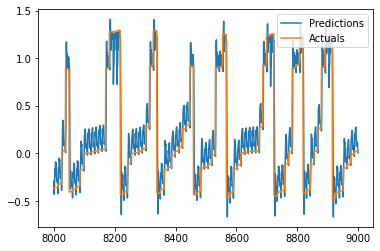

In [ ]:
plot_predictions(model2_CNN1D, X_test, y_test,8000,9000)

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


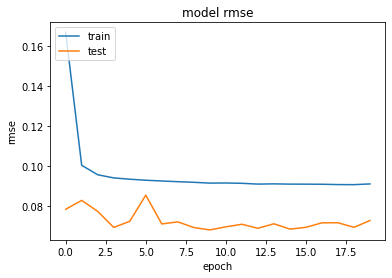

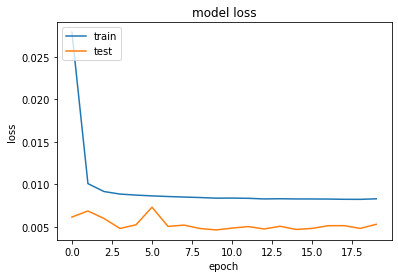

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model4_CNN1D = Sequential()
model4_CNN1D.add(InputLayer((6, 18)))
model4_CNN1D.add(Conv1D(32, kernel_size=2))
model4_CNN1D.add(Conv1D(64, kernel_size=2))
model4_CNN1D.add(MaxPooling1D(pool_size=2))
model4_CNN1D.add(Flatten())
model4_CNN1D.add(Dense(8, 'relu'))
model4_CNN1D.add(Dense(1, 'linear'))

model4_CNN1D.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 5, 32)             1184      
                                                                 
 conv1d_34 (Conv1D)          (None, 4, 64)             4160      
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 2, 64)            0         
 g1D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 8)                 1032      
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                     

In [ ]:
model4_CNN1D.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history4 = model4_CNN1D.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), 
                    epochs = 25, 
                    callbacks =[earlystopping])

Epoch 1/25
3899/3899 [==============================] - 16s 4ms/step - loss: 0.0114 - root_mean_squared_error: 0.1068 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 2/25
3899/3899 [==============================] - 15s 4ms/step - loss: 0.0056 - root_mean_squared_error: 0.0749 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0558
Epoch 3/25
3899/3899 [==============================] - 16s 4ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 4/25
3899/3899 [==============================] - 15s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0695 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 5/25
3899/3899 [==============================] - 15s 4ms/step - loss: 0.0047 - root_mean_squared_error: 0.0687 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 6/25
3899/3899 [==============================] - 15s 4ms/step - loss: 0.0047 - root_mean_squared_error: 0.0683 - val_l

975/975 [==============================] - 2s 2ms/step
MSE :  0.002292188566729245
RMSE :  0.04787680614587031
MAE: 0.005469479785312563
R2:  0.9940580804301555
mape:  0.021484815445868586


(       Predictions   Actuals
 0         0.584030  0.582056
 1         0.568440  0.581279
 2         0.583036  0.581279
 3         0.580804  0.581279
 4         0.580381  0.581279
 ...            ...       ...
 31184     1.064409  1.065581
 31185     1.062908  1.065581
 31186     1.064845  1.065581
 31187     1.069148  1.065581
 31188     1.066116  1.065581
 
 [31189 rows x 2 columns], 0.002292188566729245)

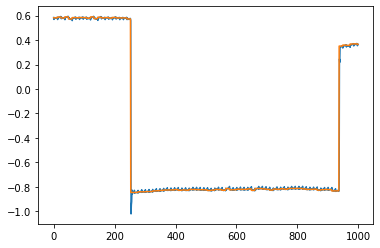

In [ ]:
plot_predictions1(model4_CNN1D, X2_val, y2_val)

In [ ]:
cp7 = ModelCheckpoint('model4_CNN1D/', save_best_only=True)
model4_CNN1D.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
history4 = model4_CNN1D.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=20, callbacks=[cp7])

Epoch 1/20
3890/3899 [============================>.] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1325

3899/3899 [==============================] - 22s 5ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0916
Epoch 2/20
3889/3899 [============================>.] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.1000

3899/3899 [==============================] - 20s 5ms/step - loss: 0.0101 - root_mean_squared_error: 0.1007 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0836
Epoch 3/20
3895/3899 [============================>.] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0994

3899/3899 [==============================] - 20s 5ms/step - loss: 0.0099 - root_mean_squared_error: 0.0993 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 4/20
3893/3899 [============================>.] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.0957

3899/3899 [==============================] - 20s 5ms/step - loss: 0.0091 - root_mean_squared_error: 0.0956 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 5/20
3888/3899 [============================>.] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.0951

3899/3899 [==============================] - 19s 5ms/step - loss: 0.0090 - root_mean_squared_error: 0.0951 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 6/20
3899/3899 [==============================] - 18s 5ms/step - loss: 0.0089 - root_mean_squared_error: 0.0942 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0774
Epoch 7/20
3894/3899 [============================>.] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.0938

3899/3899 [==============================] - 20s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0938 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 8/20
3899/3899 [==============================] - 19s 5ms/step - loss: 0.0087 - root_mean_squared_error: 0.0932 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 9/20
3899/3899 [==============================] - 17s 4ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0697
Epoch 10/20
3899/3899 [==============================] - 18s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 11/20
3899/3899 [==============================] - 19s 5ms/step - loss: 0.0087 - root_mean_squared_error: 0.0934 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 12/20
3899/3899 [==============================] - 20s 5ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - val_loss: 0.0

3899/3899 [==============================] - 21s 5ms/step - loss: 0.0084 - root_mean_squared_error: 0.0918 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0671
Epoch 17/20
3899/3899 [==============================] - 21s 5ms/step - loss: 0.0084 - root_mean_squared_error: 0.0916 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 18/20
3899/3899 [==============================] - 20s 5ms/step - loss: 0.0084 - root_mean_squared_error: 0.0915 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 19/20
3899/3899 [==============================] - 19s 5ms/step - loss: 0.0084 - root_mean_squared_error: 0.0918 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0696
Epoch 20/20
3899/3899 [==============================] - 20s 5ms/step - loss: 0.0084 - root_mean_squared_error: 0.0915 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676


dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


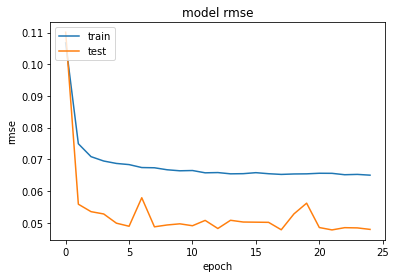

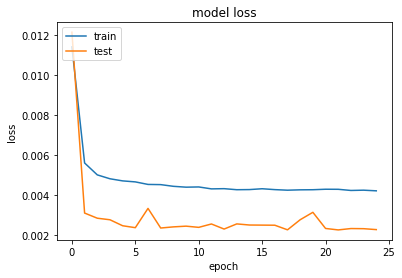

In [ ]:
# list all data in history
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['root_mean_squared_error'])
plt.plot(history4.history['val_root_mean_squared_error'])
plt.title('model rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LSTM Multivariate

In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
temp_df = data.drop(['station_id','MonthYear'], axis=1)
temp_df.head()

,LONGITUDE,LATITUDE,Elevation,MeanSL,avgTemp,Precp,SURF_SALT_PSU,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP
MonthYear,,,,,,,,,,,,,,,,,,
2010-01-01,-117.2683,32.9746,0.77,7200,58.226,3.382,33.422017,268.959459,4.841351,6.168970,2.616467,14.379124,8.909694,291.261474,1027.450946,14.187145,13.8,12.178049
2010-02-01,-117.2683,32.9746,0.77,7162,58.280,2.280,33.232548,286.091181,6.230045,7.718919,2.446512,13.570543,7.830326,289.603101,1042.581614,13.925599,13.8,12.178049
2010-03-01,-117.2683,32.9746,0.77,7042,60.242,0.681,33.379162,284.599190,6.626721,8.242973,2.799309,14.349915,8.351030,301.724965,1017.595277,14.036302,13.8,12.178049
2010-04-01,-117.2683,32.9746,0.77,7094,60.044,1.783,33.446734,290.937326,7.091504,8.800701,2.816921,13.198969,7.803797,299.442451,1065.971727,13.661785,13.8,12.178049
2010-05-01,-117.2683,32.9746,0.77,7032,62.132,0.012,33.662860,300.477089,8.335849,10.137398,2.325771,10.444257,6.278457,291.380000,1052.218868,13.617480,13.8,12.178049


In [ ]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
  
# creating a Dataframe object
df = pd.DataFrame(temp_df)
  
# define standard scaler
scaler = StandardScaler()
  
# transform data
df = scaler.fit_transform(df)

In [ ]:
X2, y2 = df_to_X_y2(df)
X2.shape, y2.shape

((155946, 6, 18), (155946,))

In [ ]:
X2_train, y2_train = X2[:124757], y2[:124757]
X2_val, y2_val = X2[124757:], y2[124757:]
# X2_val, y2_val = X2[124757:140338], y2[124757:140338]
# X2_test, y2_test = X2[140338:], y2[140338:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape
#, X2_test.shape, y2_test.shape

((124757, 6, 18), (124757,), (31189, 6, 18), (31189,))

In [ ]:
# #Standardization
# training_mean = np.mean(X2_train[:, :, 0])
# training_std = np.std(X2_train[:, :, 0])
                           
# def preprocess(X):
#   X[:, :, 0] = (X[:, :, 0] - training_mean) / training_std
#   return X

In [ ]:
# preprocess(X2_train)
# preprocess(X2_val)
# preprocess(X2_test)

In [ ]:
model1_LSTM = Sequential()
model1_LSTM.add(InputLayer((6, 6)))
model1_LSTM.add(LSTM(8))
model1_LSTM.add(Dense(8, 'relu'))
model1_LSTM.add(Dense(1, 'linear'))

model1_LSTM.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8)                 480       
                                                                 
 dense_30 (Dense)            (None, 8)                 72        
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1_LSTM/', save_best_only=True)
model1_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
lstm1_history = model1_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp1])

Epoch 1/30
2683/2693 [============================>.] - ETA: 0s - loss: 0.0481 - root_mean_squared_error: 0.2193

2693/2693 [==============================] - 24s 8ms/step - loss: 0.0480 - root_mean_squared_error: 0.2191 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1407
Epoch 2/30
2688/2693 [============================>.] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1306

2693/2693 [==============================] - 21s 8ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1359
Epoch 3/30
2693/2693 [==============================] - 16s 6ms/step - loss: 0.0163 - root_mean_squared_error: 0.1275 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1388
Epoch 4/30
2693/2693 [==============================] - 18s 7ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1480
Epoch 5/30
2693/2693 [==============================] - 15s 6ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1458
Epoch 6/30
2693/2693 [==============================] - 15s 6ms/step - loss: 0.0152 - root_mean_squared_error: 0.1234 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1498
Epoch 7/30
2693/2693 [==============================] - 18s 7ms/step - loss: 0.0150 - root_mean_squared_error: 0.1223 - val_loss: 0.0231

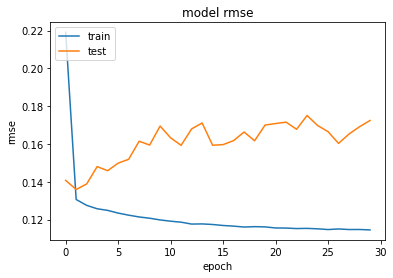

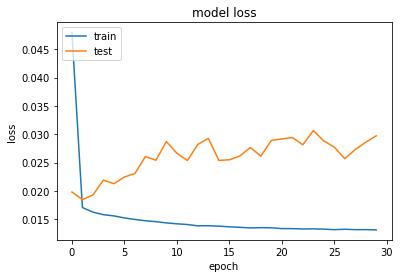

1347/1347 [==============================] - 3s 2ms/step
MSE :  0.02972577552110475
RMSE :  0.17241164554955316
MAE: 0.0754354160083309
R2:  0.970275049422759
mape:  2.589321163924662
       Predictions   Actuals
0         0.666957  0.634207
1         0.633923  0.634207
2         0.621835  0.634207
3         0.647492  0.634207
4         0.640144  0.634207
...            ...       ...
43073    -1.804589 -1.822951
43074    -1.808309 -1.822951
43075    -1.819071 -1.822951
43076    -1.796290 -1.822951
43077    -1.776897  0.634207

[43078 rows x 2 columns]


(       Predictions   Actuals
 0         0.666957  0.634207
 1         0.633923  0.634207
 2         0.621835  0.634207
 3         0.647492  0.634207
 4         0.640144  0.634207
 ...            ...       ...
 43073    -1.804589 -1.822951
 43074    -1.808309 -1.822951
 43075    -1.819071 -1.822951
 43076    -1.796290 -1.822951
 43077    -1.776897  0.634207
 
 [43078 rows x 2 columns],
 0.17241164554955316,
 0.02972577552110475,
 0.0754354160083309)

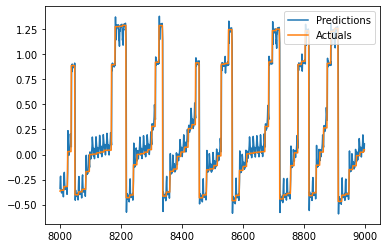

In [ ]:
plot_history(lstm1_history)
plot_predictions(model1_LSTM, X_val, y_val,8000,9000)

1347/1347 [==============================] - 4s 3ms/step
MSE :  0.05382811182351283
RMSE :  0.23200886151936703
MAE: 0.12165977866428869
R2:  0.9461726350947552
mape:  4.3145300144244425
       Predictions   Actuals
0         0.858217  0.634207
1         0.697366  0.634207
2         0.663061  0.634207
3         0.640730  0.634207
4         0.637537  0.634207
...            ...       ...
43074    -1.821295 -1.820431
43075    -1.799516 -1.820431
43076    -1.836541 -1.820431
43077    -1.814938 -1.820431
43078    -1.807014 -1.820431

[43079 rows x 2 columns]


(       Predictions   Actuals
 0         0.858217  0.634207
 1         0.697366  0.634207
 2         0.663061  0.634207
 3         0.640730  0.634207
 4         0.637537  0.634207
 ...            ...       ...
 43074    -1.821295 -1.820431
 43075    -1.799516 -1.820431
 43076    -1.836541 -1.820431
 43077    -1.814938 -1.820431
 43078    -1.807014 -1.820431
 
 [43079 rows x 2 columns],
 0.23200886151936703,
 0.05382811182351283,
 0.12165977866428869)

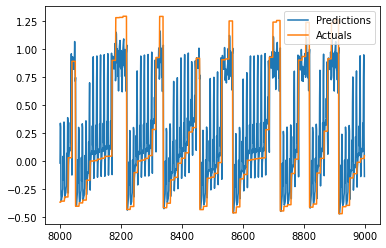

In [ ]:
plot_predictions(model1_LSTM, X_test, y_test,8000,9000)

In [ ]:
model2_LSTM = Sequential()
model2_LSTM.add(InputLayer((6, 6)))
model2_LSTM.add(LSTM(64))
model2_LSTM.add(Dense(8, 'relu'))
model2_LSTM.add(Dense(1, 'linear'))

model2_LSTM.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18176     
                                                                 
 dense_34 (Dense)            (None, 8)                 520       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2_LSTM/', save_best_only=True)
model2_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
lstm2_history = model2_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp2])

Epoch 1/30
2693/2693 [==============================] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.1590

2693/2693 [==============================] - 28s 10ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381
Epoch 2/30
2693/2693 [==============================] - 22s 8ms/step - loss: 0.0163 - root_mean_squared_error: 0.1276 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1485
Epoch 3/30
2693/2693 [==============================] - 19s 7ms/step - loss: 0.0152 - root_mean_squared_error: 0.1232 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1585
Epoch 4/30
2693/2693 [==============================] - 21s 8ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1425
Epoch 5/30
2693/2693 [==============================] - 22s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1531
Epoch 6/30
2687/2693 [============================>.] - ETA: 0s - loss: 0.0137 - root_mean_squared_error: 0.1170

2693/2693 [==============================] - 27s 10ms/step - loss: 0.0137 - root_mean_squared_error: 0.1170 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 7/30
2693/2693 [==============================] - 19s 7ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1387
Epoch 8/30
2693/2693 [==============================] - 23s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1441
Epoch 9/30
2692/2693 [============================>.] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1146

2693/2693 [==============================] - 25s 9ms/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1363
Epoch 10/30
2693/2693 [==============================] - 23s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 11/30
2692/2693 [============================>.] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1137

2693/2693 [==============================] - 24s 9ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1347
Epoch 12/30
2693/2693 [==============================] - 23s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1366
Epoch 13/30
2693/2693 [==============================] - 19s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1450
Epoch 14/30
2693/2693 [==============================] - 20s 8ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 15/30
2693/2693 [==============================] - 21s 8ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 16/30
2693/2693 [==============================] - 20s 8ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0

2693/2693 [==============================] - 25s 9ms/step - loss: 0.0121 - root_mean_squared_error: 0.1101 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1330
Epoch 22/30
2693/2693 [==============================] - 19s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1098 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1454
Epoch 23/30
2693/2693 [==============================] - 21s 8ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1401
Epoch 24/30
2693/2693 [==============================] - 21s 8ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1389
Epoch 25/30
2693/2693 [==============================] - 20s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1464
Epoch 26/30
2693/2693 [==============================] - 19s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0

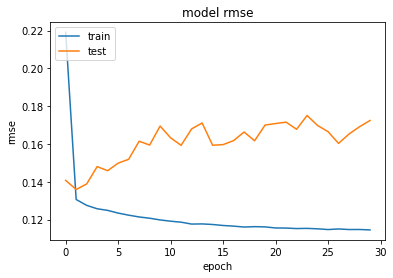

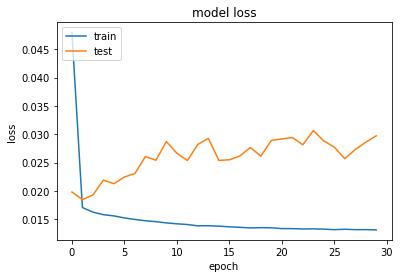

1347/1347 [==============================] - 4s 3ms/step
MSE :  1.1247942322807656
RMSE :  1.0605631675109057
MAE: 0.8873059618840813
R2:  -0.1247630172129115
mape:  2.7653213170600104
       Predictions   Actuals
0        -0.014934  0.634207
1         0.002423  0.634207
2         0.016737  0.634207
3         0.030699  0.634207
4         0.051540  0.634207
...            ...       ...
43073     0.123928 -1.822951
43074     0.049914 -1.822951
43075     0.067979 -1.822951
43076     0.124357 -1.822951
43077     0.136056  0.634207

[43078 rows x 2 columns]


(       Predictions   Actuals
 0        -0.014934  0.634207
 1         0.002423  0.634207
 2         0.016737  0.634207
 3         0.030699  0.634207
 4         0.051540  0.634207
 ...            ...       ...
 43073     0.123928 -1.822951
 43074     0.049914 -1.822951
 43075     0.067979 -1.822951
 43076     0.124357 -1.822951
 43077     0.136056  0.634207
 
 [43078 rows x 2 columns],
 1.0605631675109057,
 1.1247942322807656,
 0.8873059618840813)

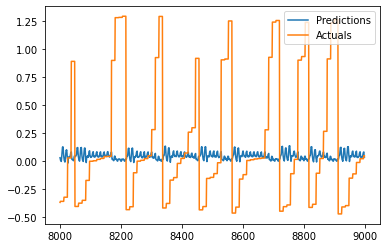

In [ ]:
plot_history(lstm1_history)
plot_predictions(model1_LSTM, X_val, y_val,8000,9000)

In [ ]:
plot_predictions(model1_LSTM, X_test, y_test,8000,9000)

### Plot Predictions

In [ ]:
def plot_predictions1(model, X, y, start=0, end=1000):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  print('MSE : ',mse(y, predictions,squared=True))
  print('RMSE : ',mse(y, predictions,squared=False))
  print("MAE:", mae(y, predictions))
  print("R2: ",r2(y, predictions))
  print("mape: ",mape(y, predictions))
  return df, mse(y, predictions)

MSE :  0.0027880902721019573
RMSE :  0.05280236994777751
MAE: 0.009662133577492255


(       Predictions   Actuals
 0         0.542688  0.538558
 1         0.545229  0.538558
 2         0.539988  0.538558
 3         0.533481  0.538558
 4         0.537795  0.538558
 ...            ...       ...
 15603     1.067107  1.065581
 15604     1.066534  1.065581
 15605     1.066362  1.065581
 15606     1.051169  1.065581
 15607     1.071907  1.065581
 
 [15608 rows x 2 columns], 0.0027880902721019573)

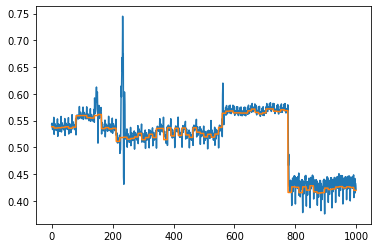

In [ ]:
plot_predictions1(model2_LSTM, X2_test, y2_test)

MSE :  0.0018781645867462088
RMSE :  0.04333779628391606
MAE: 0.00833172072780966


(       Predictions   Actuals
 0         0.593042  0.582056
 1         0.591978  0.581279
 2         0.579049  0.581279
 3         0.596512  0.581279
 4         0.582789  0.581279
 ...            ...       ...
 15576     0.579831  0.562638
 15577     0.558415  0.538558
 15578     0.556328  0.538558
 15579     0.554879  0.538558
 15580     0.553541  0.538558
 
 [15581 rows x 2 columns], 0.0018781645867462088)

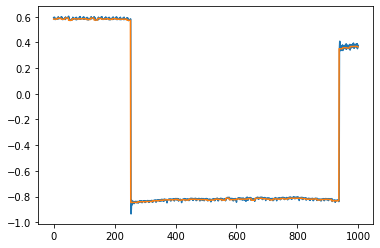

In [ ]:
plot_predictions1(model2_LSTM, X2_val, y2_val)

In [ ]:
CNN_LSTM2 = Sequential()
CNN_LSTM2.add(InputLayer((6, 18)))
CNN_LSTM2.add(Conv1D(32, kernel_size=1))
#CNN_LSTM.add(Flatten())

CNN_LSTM2.add(LSTM(64))
CNN_LSTM2.add(Dense(8, 'relu'))
CNN_LSTM2.add(Dense(1, 'linear'))


CNN_LSTM2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             608       
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25,969
Trainable params: 25,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp7 = ModelCheckpoint('CNN_LSTM2/', save_best_only=True)
CNN_LSTM2.compile(loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
cp7 = ModelCheckpoint('CNN_LSTM2/', save_best_only=True)
CNN_LSTM2.compile(loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
history = CNN_LSTM2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp7])

Epoch 1/10
3894/3899 [============================>.] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0999

3899/3899 [==============================] - 36s 9ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0514
Epoch 2/10
3897/3899 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0698

3899/3899 [==============================] - 41s 11ms/step - loss: 0.0049 - root_mean_squared_error: 0.0698 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 3/10
3894/3899 [============================>.] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0677

3899/3899 [==============================] - 37s 9ms/step - loss: 0.0046 - root_mean_squared_error: 0.0677 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0461
Epoch 4/10
3895/3899 [============================>.] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0668

3899/3899 [==============================] - 35s 9ms/step - loss: 0.0045 - root_mean_squared_error: 0.0667 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0445
Epoch 5/10
3899/3899 [==============================] - 29s 7ms/step - loss: 0.0044 - root_mean_squared_error: 0.0663 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 6/10
3899/3899 [==============================] - 29s 7ms/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 7/10
3899/3899 [==============================] - 35s 9ms/step - loss: 0.0043 - root_mean_squared_error: 0.0656 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 8/10
3899/3899 [==============================] - 35s 9ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 9/10
3899/3899 [==============================] - 28s 7ms/step - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.0021

3899/3899 [==============================] - 35s 9ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441


MSE :  0.0027317449810762397
RMSE :  0.05226609781757425
MAE: 0.009576186372247218


(       Predictions   Actuals
 0         0.557194  0.538558
 1         0.551127  0.538558
 2         0.542325  0.538558
 3         0.547088  0.538558
 4         0.544274  0.538558
 ...            ...       ...
 15603     1.061057  1.065581
 15604     1.066293  1.065581
 15605     1.066984  1.065581
 15606     1.068535  1.065581
 15607     1.066921  1.065581
 
 [15608 rows x 2 columns], 0.0027317449810762397)

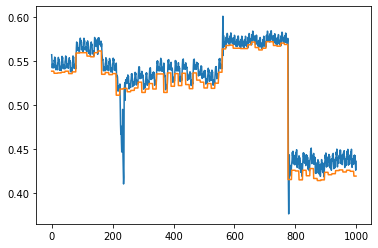

In [ ]:
plot_predictions1(CNN_LSTM2, X2_test, y2_test)

In [ ]:
CNN_LSTM = Sequential()
CNN_LSTM.add(InputLayer((6, 18)))
CNN_LSTM.add(Conv1D(64, kernel_size=2))
#CNN_LSTM.add(Flatten())

CNN_LSTM.add(LSTM(64))
CNN_LSTM.add(Dense(8, 'relu'))
CNN_LSTM.add(Dense(1, 'linear'))


CNN_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             2368      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 35,921
Trainable params: 35,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp6 = ModelCheckpoint('CNN_LSTM/', save_best_only=True)
CNN_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

# cp6 = ModelCheckpoint('CNN_LSTM/', save_best_only=True)
# CNN_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam, metrics=[RootMeanSquaredError()])

In [ ]:
history = CNN_LSTM.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp6])

Epoch 1/10
3898/3899 [============================>.] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0634

3899/3899 [==============================] - 42s 10ms/step - loss: 0.0040 - root_mean_squared_error: 0.0634 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 2/10
3898/3899 [============================>.] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0632

3899/3899 [==============================] - 43s 11ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 3/10
3899/3899 [==============================] - 34s 9ms/step - loss: 0.0040 - root_mean_squared_error: 0.0634 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0444
Epoch 4/10
3897/3899 [============================>.] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0628

3899/3899 [==============================] - 40s 10ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 5/10
3899/3899 [==============================] - 34s 9ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0439
Epoch 6/10
3896/3899 [============================>.] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0632

3899/3899 [==============================] - 43s 11ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 7/10
3899/3899 [==============================] - 35s 9ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 8/10
3899/3899 [==============================] - 35s 9ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 9/10
3899/3899 [==============================] - 35s 9ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0436
Epoch 10/10
3899/3899 [==============================] - 36s 9ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0442


MSE :  0.002616986652373355
RMSE :  0.051156491791104625
MAE: 0.010209363306700123


(       Predictions   Actuals
 0         0.540674  0.538558
 1         0.538440  0.538558
 2         0.534420  0.538558
 3         0.538613  0.538558
 4         0.540632  0.538558
 ...            ...       ...
 15603     1.066531  1.065581
 15604     1.065465  1.065581
 15605     1.061067  1.065581
 15606     1.062229  1.065581
 15607     1.073089  1.065581
 
 [15608 rows x 2 columns], 0.002616986652373355)

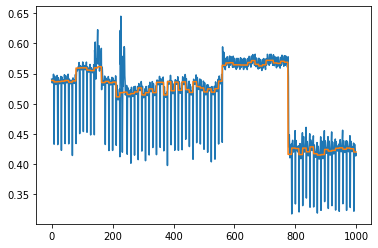

In [ ]:
plot_predictions1(CNN_LSTM, X2_test, y2_test)

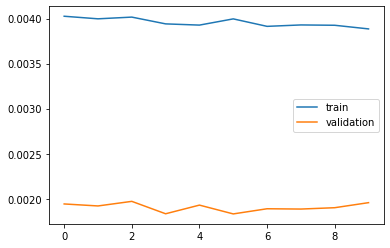

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

MSE :  0.001900781324297874
RMSE :  0.043597950918568114
MAE: 0.01089188633880632


(       Predictions   Actuals
 0         0.588759  0.582056
 1         0.587549  0.581279
 2         0.574457  0.581279
 3         0.577042  0.581279
 4         0.570240  0.581279
 ...            ...       ...
 15576     0.557476  0.562638
 15577     0.521527  0.538558
 15578     0.543095  0.538558
 15579     0.544442  0.538558
 15580     0.540687  0.538558
 
 [15581 rows x 2 columns], 0.001900781324297874)

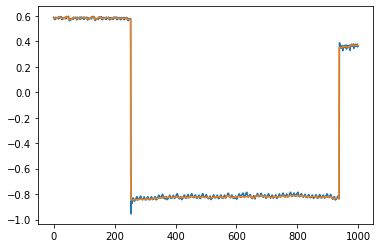

In [ ]:
plot_predictions1(CNN_LSTM, X2_val, y2_val)